In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [60]:
data = pd.read_csv("Ads.csv")
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [53]:
real_x = data.iloc[:,[2,3]].values
real_y = data.iloc[:,4].values
real_x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    20,  19000],
       [    22,  20000],
       [    32,  43000],
       [    40,  80000],
       [    21,  76000],
       [    26,  58000],
       [    36,  84000],
       [    29, 150000],
       [    30,  80000],
       [    34,  65000],
       [    45, 200000],
       [    50, 220000],
       [    37, 250000],
       [    28,  70000],
       [    25,  57000],
       [    23,  76000],
       [    26,  58000],
       [    20,  84000],
       [    19, 150000],
       [    41, 250000],
       [    37,  65000],
       [    20,  19000],
       [    30,  20000],
       [    40, 150000],
       [    39,  57000],
       [    42, 170000],
       [    43,  60000],
       [    28,  84000],
       [    32, 150000],
       [    34,  33000],


In [54]:
training_x,test_x,training_y,test_y = train_test_split(real_x,real_y, test_size = 0.25, random_state=0)
test_x

array([[    41, 250000],
       [    22,  20000],
       [    20,  19000],
       [    37, 250000],
       [    26,  43000],
       [    19, 150000],
       [    20, 160000],
       [    30,  20000],
       [    26,  58000],
       [    19,  76000],
       [    40, 150000],
       [    20,  19000],
       [    20,  84000]])

In [55]:
scaler = StandardScaler()
training_x = scaler.fit_transform(training_x)
test_x = scaler.fit_transform(test_x)
test_x

array([[ 1.87422812,  1.85199913],
       [-0.52439543, -0.98627734],
       [-0.77688212, -0.99861768],
       [ 1.36925474,  1.85199913],
       [-0.01942205, -0.7024497 ],
       [-0.90312547,  0.61796588],
       [-0.77688212,  0.74136921],
       [ 0.48555133, -0.98627734],
       [-0.01942205, -0.51734471],
       [-0.90312547, -0.29521872],
       [ 1.74798477,  0.61796588],
       [-0.77688212, -0.99861768],
       [-0.77688212, -0.19649606]])

In [56]:
classifer_LR = LogisticRegression(random_state=0)  # Random_state=0, ye mere result ko mach karane me help karega
classifer_LR.fit(training_x, training_y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
y_pred = classifer_LR.predict(test_x)
y_pred

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0])

In [58]:
test_y

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1])

In [59]:
c_m = confusion_matrix(test_y,y_pred)    # mera corect 11 
c_m

array([[7, 1],
       [1, 4]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


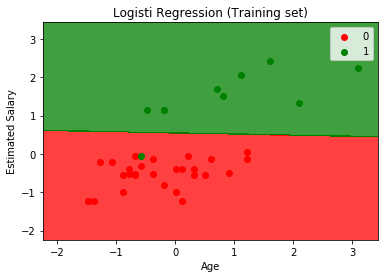

In [73]:
from matplotlib.colors import ListedColormap
x_set, y_set = training_x, training_y
x1,x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() -1, stop = x_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
                    
plt.contourf(x1, x2, classifer_LR.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(("red", "green")))
plt.xlim(x1.min(), x1.max())
plt.xlim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
     plt.scatter(x_set[y_set == j,0], x_set[y_set == j, 1],
                c = ListedColormap(("red", "green"))(i), label = j)
plt.title("Logisti Regression (Training set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()                    
                    

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


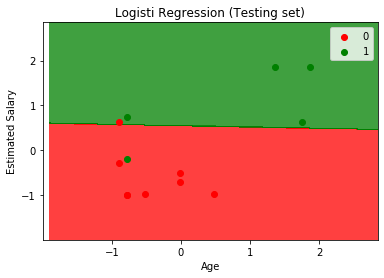

In [74]:
x_set, y_set = test_x, test_y
x1,x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() -1, stop = x_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
                    
plt.contourf(x1, x2, classifer_LR.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(("red", "green")))
plt.xlim(x1.min(), x1.max())
plt.xlim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
     plt.scatter(x_set[y_set == j,0], x_set[y_set == j, 1],
                c = ListedColormap(("red", "green"))(i), label = j)
plt.title("Logisti Regression (Testing set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()                    
                    